In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import matplotlib
from scipy.stats import sem
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines
import scipy
from matplotlib.lines import Line2D

In [2]:
def rescale(X, b, a):
    maxx = X.max()
    minx = X.min()
    return (b - a) * (X - minx) / (maxx - minx) + a

# Import acoustic data

In [26]:

acoustics = h5py.File("data\\peak_comparison\\acoustic_representations_9conds.h5","r")
ind_acoustics = np.asarray(acoustics['acoustic_representations_9conds'])

#get information related to envelope data 
dic = {}
for k in acoustics['acoustic_representations_9conds'].attrs.keys():
    dic[k] = acoustics['acoustic_representations_9conds'].attrs[k]

freqs = dic['freqs']
conds = dic['conditions']
acoustic_feature = dic['acoustic_feature']
acoustics.close()


# Spectral flux

In [8]:
# aestetics
names_conds = ['3HZ low', '3Hz medium', '3Hz high',
               '6Hz low', '6Hz medium', '6Hz high',
               '9Hz low', '9Hz medium', '9Hz high']
colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]

pa1 = mlines.Line2D([0], [0], color=colors[0], lw=4)
pa2 = mlines.Line2D([0], [0], color=colors[1], lw=4)
pa3 = mlines.Line2D([0], [0], color=colors[2], lw=4)

pb1 = mlines.Line2D([0], [0], color=colors[3], lw=4)
pb2 =mlines.Line2D([0], [0], color=colors[4], lw=4)
pb3 = mlines.Line2D([0], [0], color=colors[5], lw=4)

pc1 =mlines.Line2D([0], [0], color=colors[6], lw=4)
pc2 = mlines.Line2D([0], [0], color=colors[7], lw=4)
pc3 =mlines.Line2D([0], [0], color=colors[8], lw=4)

pp = mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=10,label='Syllabic timescale')
                
custom_lines = [mlines.Line2D([0], [0], color=colors[0], lw=4),
                mlines.Line2D([0], [0], color=colors[1], lw=4),
                mlines.Line2D([0], [0], color=colors[2], lw=4),
               mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=22,label='Syllabic timescale')]

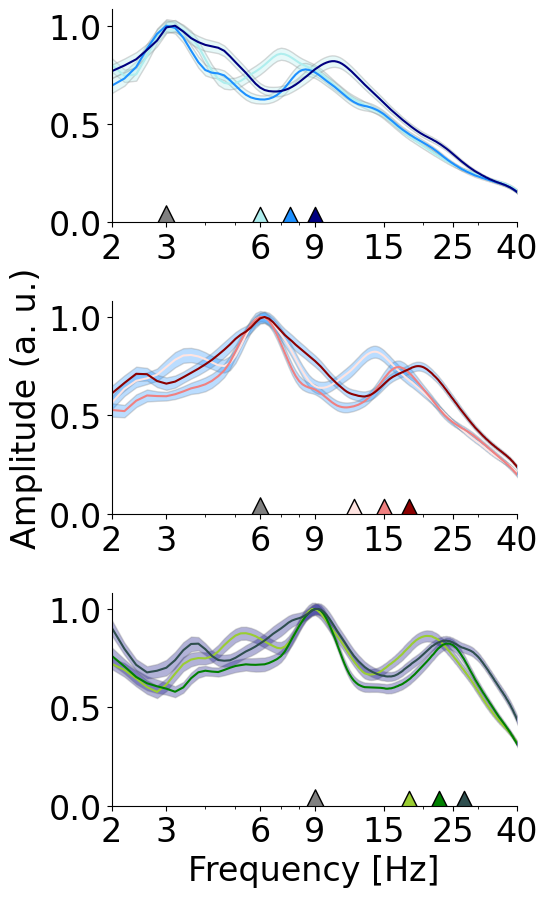

In [9]:
# Plot mean TFrepresentation of Spectral flux across aLL sentences from the different conditions

name_cond = ['low', 'medium', 'high','low', 'medium', 'high', 'low', 'medium', 'high']
matplotlib.rcParams.update({'font.size': 24})

fig,axs = plt.subplots(3,1, figsize=(6,9.5))
idxx = [[0,1,2],[3,4,5],[6,7,8]]
alphas = [1,0.7,0.4]
condi = [3,6,9]
ys = [0.001, 0.0015, 0.002]
legs = [[pa1,pa2,pa3,pp],[pb1,pb2,pb3,pp],[pc1,pc2,pc3,pp]]

colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]


for i, (num,ax) in enumerate(zip(range(3),axs.ravel())) :
        for j in range(3):
            aldat = np.array([rescale(i,1,0) for i in ind_acoustics[0][idxx[i][j]]])
            doto = rescale(np.mean(ind_acoustics[0][idxx[i][j]],0),1,0)
            ax.plot(freqs,doto,color= colors[idxx[i][j]],label=name_cond[idxx[i][j]]);
            ax.fill_between(freqs,doto +sem(aldat),doto -sem(aldat),alpha = 0.3, edgecolor = 'grey', facecolor = colors[i] ) 
           
        if num == 0:
            ax.scatter(6,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=1)
            ax.scatter(7.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=1)
            ax.scatter(9,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=1)

        
        if num == 1:
            ax.set_ylabel('Amplitude (a. u.)',fontsize=24);
            ax.scatter(12,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=1)
            ax.scatter(15,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=1)
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=1)
        
        if num == 2:
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=1)
            ax.scatter(22.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='green',zorder=1)
            ax.scatter(27,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=1)


        ax.spines['right'].set_visible(False)
        ax.scatter(condi[i],0.0005, marker='^',s = 575,linewidth=1,edgecolor='black',zorder=1, color='grey')
        ax.spines['top'].set_visible(False)
        ax.set_xlim(2,40)
        ax.set_ylim(0)
        ax.semilogx()   
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());

        ax.set_xticks([2,3,6,9,15,25,40]);
        ax.set_yticks([0.0,0.5,1]);
ax.set_xlabel("Frequency [Hz]",fontsize=24);
fig.tight_layout()
#fig.savefig( "/FIG2/spec_flux.svg",  dpi=300,  format="svg", metadata=None,facecolor=None, edgecolor=None , bbox_inches='tight')

In [10]:
# retrieve peaks extracted from the TF representation of the spectral flux
corr = pd.read_csv("data\\acoustics\\cors_sf.csv")

In [11]:
#rfirst = correlation between real data form the first peaks and expected first peaks
#rsecond = correlation between real data form the second peaks and expected second peaks
#ffirst = correlation between real data form the first peaks and expected second peaks
#fsecond =  correlation between real data form the second peaks and expected first peaks

In [12]:
# get correlations between predicted peaks and observed peaks
rfirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_low'].values)[0][1]
rsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_high'].values)[0][1]
ffirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_high'].values)[0][1]
fsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_low'].values)[0][1]

# get data and format for figure
firstspp = corr['pred_peak_low'].values
secspp = corr['pred_peak_high'].values
fi = corr['real_peak_low'].values
se = corr['real_peak_high'].values
doot = [fi,se,fi,se]
against = [firstspp,firstspp,secspp,secspp]

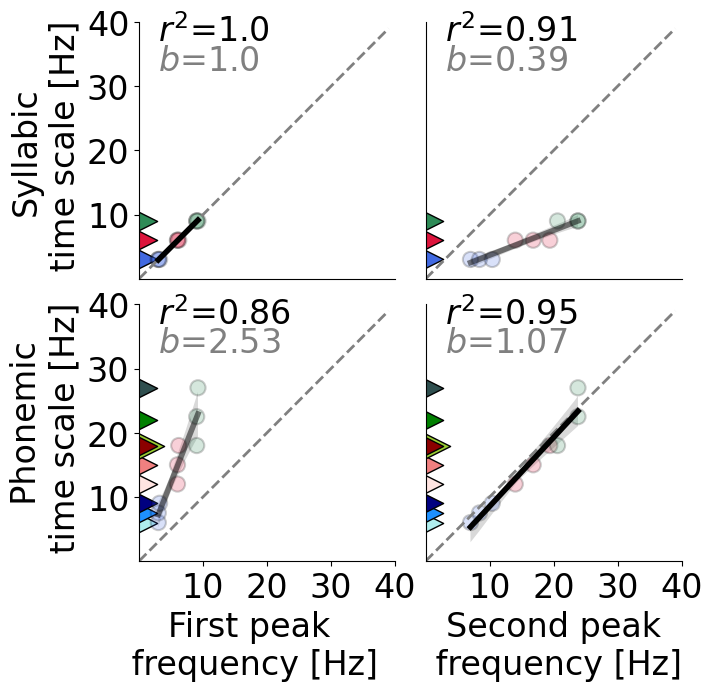

In [13]:
# plot data
colours = np.repeat(["royalblue","crimson","seagreen"],3)
alphas = [1,0.5,0.5,1]
matplotlib.rcParams.update({'font.size': 24})

xlabs = ["","","First peak\n frequency [Hz]","Second peak\n frequency [Hz]"]
ylabs = ["Syllabic\n time scale [Hz]","","  Phonemic\n time scale [Hz]",""]

cors = [str(i**2)[0:4] for i in [rfirst ,ffirst,fsecond,rsecond]] 
xs = [3,3,3,3]
ys = [37,37,37,37]
lis = [40,40,40,40]

titles = []
fig,axs = plt.subplots(2,2,figsize=(7,7))
for i, ax in enumerate(axs.flat):
    ax.plot(np.arange(0,lis[i]),np.arange(0,lis[i]),'--',linewidth=2, color = 'gray')

    x = doot[i]
    y = against[i]

    x = x[np.argsort(y)]
    y = np.array(y)[np.argsort(y)]

    a, b,rval,pval,seintersder = scipy.stats.linregress(x, y)
    coco = np.corrcoef(x,y)[0][1]
    sns.regplot(x = x, y=y,ax = ax,scatter = False,color="k",line_kws={"alpha":alphas[i],"linewidth":4})
    ax.scatter(x,y,color=colours,alpha=0.2,s=120,linewidths=1.5,edgecolors='black');
    ax.set_xticks([10,20,30,40])
    ax.set_yticks([10,20,30,40])

    if i in [0,1]:
        ax.scatter(0.4,3, marker='>',s = 475,linewidth=1,edgecolor='black', color='royalblue',zorder=0)
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='crimson',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='seagreen',zorder=0)
        ax.set_xticks([])
    else:
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=0)
        ax.scatter(0.4,7.5, marker='>',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=0)
        ax.scatter(0.4,12, marker='>',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=0)
        ax.scatter(0.4,15, marker='>',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=0)
        ax.scatter(1.5,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=0)
        ax.scatter(0.4,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=0)
        ax.scatter(0.4,22, marker='>',s = 475,linewidth=1,edgecolor='black', color='green',zorder=0)
        ax.scatter(0.4,27, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=0)
    axs.ravel()[1].set_yticks([])
    axs.ravel()[3].set_yticks([])

    ax.set_xlim(0,lis[i])
    ax.set_ylim(0,lis[i])

    axs.ravel()[2].xaxis.set_label_coords(0.43,-0.19)
    axs.ravel()[3].xaxis.set_label_coords(0.59,-0.19)

    ax.set_xlabel(xlabs[i],fontsize=24)
    ax.set_ylabel(ylabs[i],fontsize=24)
    ax.text(xs[i],ys[i],r'$r^{2}$=' + str(np.round(coco**2,2)),size=24)#,alpha=alphas[i])cors[i]
    ax.text(xs[i],ys[i]-4.5,r'$b$=' +str(np.round(a,2)), color = "grey",size=24)#,alpha=alphas[i])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.1,wspace=0.12)
#fig.savefig( "FIG2/SF.svg",  dpi=300, format='svg', metadata=None,facecolor=None, edgecolor=None , bbox_inches='tight')

In [14]:
# read accuracy data for all acoustic features
acc_phon = pd.read_csv("data\\acoustics\\phonemic_accuracy_scores.csv")
acc_syll = pd.read_csv("data\\acoustics\\syllabic_accuracy_scores.csv")


In [15]:
# keep only spectral_flux
phon = acc_phon.loc[acc_phon['features']=='spectral_flux']['accuracies'].values
syll = acc_syll.loc[acc_phon['features']=='spectral_flux']['accuracies'].values

dic = {'conditions': np.repeat(['syllabic time scale','phonemic time scale'],10),
       'decoding accuracy (%)': np.concatenate((syll,phon)) }
df = pd.DataFrame.from_dict(dic)

def jiters(x):
    np.random.seed(seed=100)
    return x+ np.random.normal(0,0.05,len(x))

std1 = np.std(df['decoding accuracy (%)'][0:10],0)
std2 = np.std(df['decoding accuracy (%)'][10::],0)
dataplot = df.groupby('conditions')['decoding accuracy (%)'].mean().values[::-1]



syllval = df['decoding accuracy (%)'].values[0:10]
phonval = df['decoding accuracy (%)'].values[10::]

t,stat1 =stats.ttest_ind(syllval, phonval)

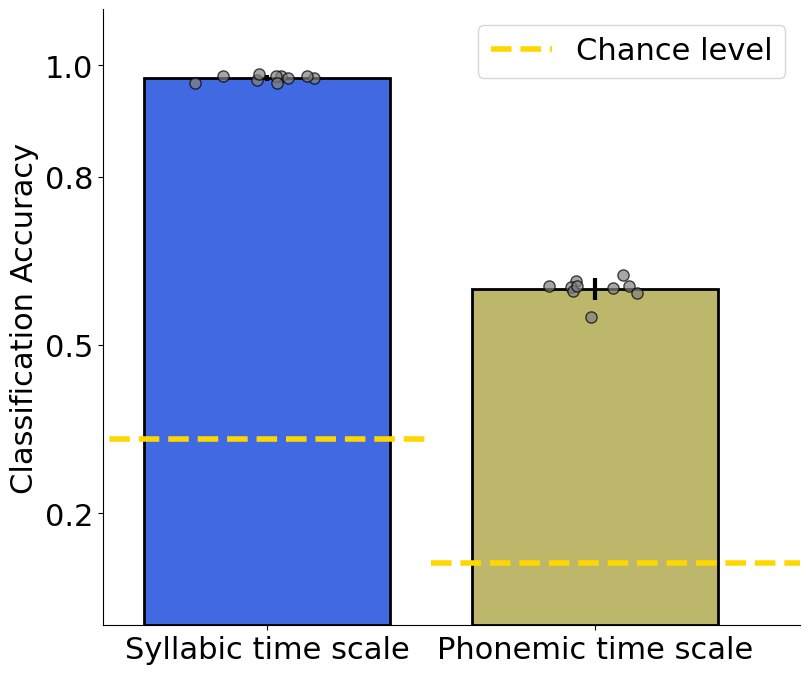

In [16]:
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=(9,8))
custom_line = [Line2D([1], [0], color='gold', lw=4, linestyle='--')]
ax.bar(x=[0.5,0.9], height=dataplot ,yerr =[std1,std2], color= ['royalblue','darkkhaki'],edgecolor='k',linewidth=2,width=0.3,error_kw = {"linewidth":3})
ax.scatter(jiters(np.repeat([0.5,0.9],10)),df['decoding accuracy (%)'].values,s=65,color="grey", edgecolor='k',alpha=0.7)


#sns.swarmplot(x = "conditions", y= 'decoding accuracy (%)', data=df,ax = ax,size=7, color='grey',alpha=0.4, linewidth = 2,edgecolor = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1.1)
ax.set_xlim(0.3,1.15)
#ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.hlines(1/3,0.2,0.7, linestyle='--', color = 'gold',linewidth=4);
ax.hlines(1/9,0.7,1.15, linestyle='--', color = 'gold',linewidth=4);
ax.set_xticks([0.5,0.9],['Syllabic time scale','Phonemic time scale']);
ax.set_yticks([0.2,0.5,0.8,1]);
ax.set_ylabel("Classification Accuracy");
ax.legend(custom_line, ['Chance level']);
#fig.savefig( "C:\\Users\\Jeremy\\Documents\\RESEARCH\\projet_3_in_cambridge\\figures\\SVM_SF.png",  dpi=300, format=None, metadata=None,
 #   bbox_inches=None,  facecolor='white', edgecolor='white' )



# Envelope

In [17]:
# aestetics
names_conds = ['3HZ low', '3Hz medium', '3Hz high',
               '6Hz low', '6Hz medium', '6Hz high',
               '9Hz low', '9Hz medium', '9Hz high']
colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]

pa1 = mlines.Line2D([0], [0], color=colors[0], lw=4)
pa2 = mlines.Line2D([0], [0], color=colors[1], lw=4)
pa3 = mlines.Line2D([0], [0], color=colors[2], lw=4)

pb1 = mlines.Line2D([0], [0], color=colors[3], lw=4)
pb2 =mlines.Line2D([0], [0], color=colors[4], lw=4)
pb3 = mlines.Line2D([0], [0], color=colors[5], lw=4)

pc1 =mlines.Line2D([0], [0], color=colors[6], lw=4)
pc2 = mlines.Line2D([0], [0], color=colors[7], lw=4)
pc3 =mlines.Line2D([0], [0], color=colors[8], lw=4)

pp = mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=10,label='Syllabic timescale')
                
custom_lines = [mlines.Line2D([0], [0], color=colors[0], lw=4),
                mlines.Line2D([0], [0], color=colors[1], lw=4),
                mlines.Line2D([0], [0], color=colors[2], lw=4),
               mlines.Line2D([], [], marker='^', linestyle='None',mec='k', mfc='grey', mew=1,
                          markersize=22,label='Syllabic timescale')]

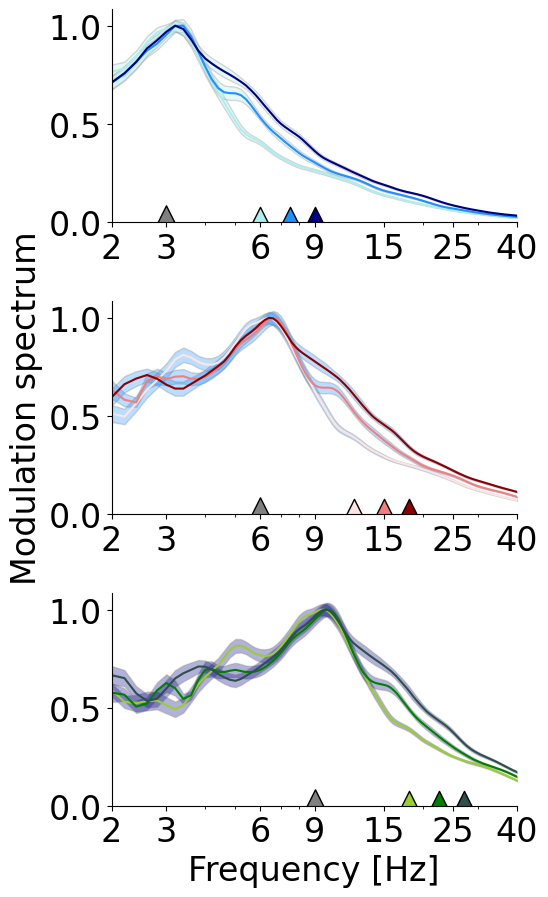

In [18]:
# Plot mean TFrepresentation of Spectral flux across aLL sentences from the different conditions

name_cond = ['low', 'medium', 'high','low', 'medium', 'high', 'low', 'medium', 'high']
matplotlib.rcParams.update({'font.size': 24})

fig,axs = plt.subplots(3,1, figsize=(6,9.5))
idxx = [[0,1,2],[3,4,5],[6,7,8]]
alphas = [1,0.7,0.4]
condi = [3,6,9]
ys = [0.001, 0.0015, 0.002]
legs = [[pa1,pa2,pa3,pp],[pb1,pb2,pb3,pp],[pc1,pc2,pc3,pp]]

colors = ['paleturquoise',"dodgerblue","navy","mistyrose","lightcoral","darkred","yellowgreen","green","darkslategray"]


for i, (num,ax) in enumerate(zip(range(3),axs.ravel())) :
        for j in range(3):
            aldat = np.array([rescale(i,1,0) for i in ind_acoustics[1][idxx[i][j]]])
            doto = rescale(np.mean(ind_acoustics[1][idxx[i][j]],0),1,0)
            ax.plot(freqs,doto,color= colors[idxx[i][j]],label=name_cond[idxx[i][j]]);
            ax.fill_between(freqs,doto +sem(aldat),doto -sem(aldat),alpha = 0.3, edgecolor = 'grey', facecolor = colors[i] ) 
           
        if num == 0:
            ax.scatter(6,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=1)
            ax.scatter(7.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=1)
            ax.scatter(9,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=1)

        
        if num == 1:
            ax.set_ylabel('Modulation spectrum',fontsize=24);
            ax.scatter(12,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=1)
            ax.scatter(15,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=1)
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=1)
        
        if num == 2:
            ax.scatter(18,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=1)
            ax.scatter(22.5,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='green',zorder=1)
            ax.scatter(27,0.0005, marker='^',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=1)


        ax.spines['right'].set_visible(False)
        ax.scatter(condi[i],0.0005, marker='^',s = 575,linewidth=1,edgecolor='black',zorder=1, color='grey')
        ax.spines['top'].set_visible(False)
        ax.set_xlim(2,40)
        ax.set_ylim(0)
        ax.semilogx()   
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0)) 
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());

        ax.set_xticks([2,3,6,9,15,25,40]);
        ax.set_yticks([0.0,0.5,1]);
ax.set_xlabel("Frequency [Hz]",fontsize=24);
fig.tight_layout()
#fig.savefig( "/FIG2/env.svg",  dpi=300,  format="svg", metadata=None,facecolor=None, edgecolor=None , bbox_inches='tight')

In [19]:
# retrieve peaks extracted from the TF representation of the spectral flux
corr = pd.read_csv("data\\acoustics\\cors_env.csv")

In [20]:
#rfirst = correlation between real data form the first peaks and expected first peaks
#rsecond = correlation between real data form the second peaks and expected second peaks
#ffirst = correlation between real data form the first peaks and expected second peaks
#fsecond =  correlation between real data form the second peaks and expected first peaks

In [21]:
# get correlations between predicted peaks and observed peaks
rfirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_low'].values)[0][1]
rsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_high'].values)[0][1]
ffirst = np.corrcoef(corr['real_peak_low'].values,corr['pred_peak_high'].values)[0][1]
fsecond = np.corrcoef(corr['real_peak_high'].values,corr['pred_peak_low'].values)[0][1]

# get data and format for figure
firstspp = corr['pred_peak_low'].values
secspp = corr['pred_peak_high'].values
fi = corr['real_peak_low'].values
se = corr['real_peak_high'].values
doot = [fi,se,fi,se]
against = [firstspp,firstspp,secspp,secspp]

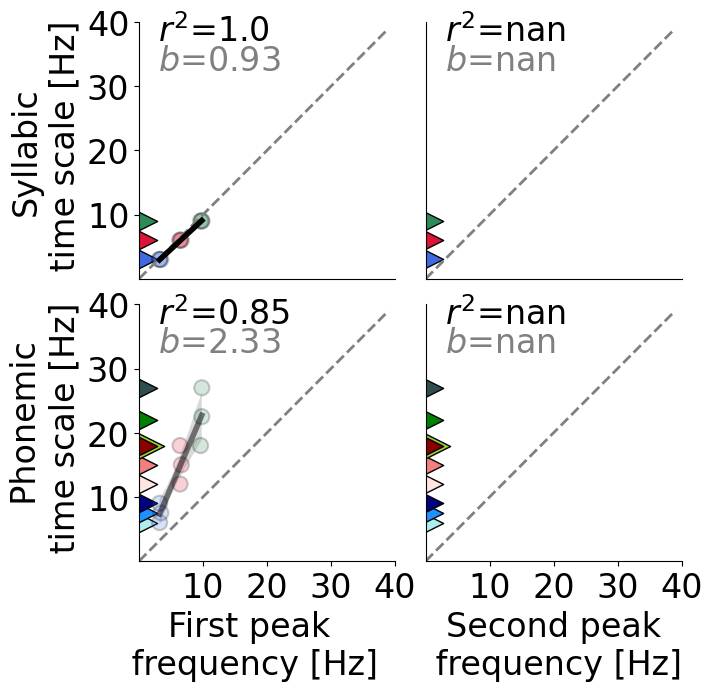

In [22]:
# plot data
colours = np.repeat(["royalblue","crimson","seagreen"],3)
alphas = [1,0.5,0.5,1]
matplotlib.rcParams.update({'font.size': 24})

xlabs = ["","","First peak\n frequency [Hz]","Second peak\n frequency [Hz]"]
ylabs = ["Syllabic\n time scale [Hz]","","  Phonemic\n time scale [Hz]",""]

cors = [str(i**2)[0:4] for i in [rfirst ,ffirst,fsecond,rsecond]] 
xs = [3,3,3,3]
ys = [37,37,37,37]
lis = [40,40,40,40]

titles = []
fig,axs = plt.subplots(2,2,figsize=(7,7))
for i, ax in enumerate(axs.flat):
    ax.plot(np.arange(0,lis[i]),np.arange(0,lis[i]),'--',linewidth=2, color = 'gray')

    x = doot[i]
    y = against[i]

    x = x[np.argsort(y)]
    y = np.array(y)[np.argsort(y)]

    a, b,rval,pval,seintersder = scipy.stats.linregress(x, y)
    coco = np.corrcoef(x,y)[0][1]
    sns.regplot(x = x, y=y,ax = ax,scatter = False,color="k",line_kws={"alpha":alphas[i],"linewidth":4})
    ax.scatter(x,y,color=colours,alpha=0.2,s=120,linewidths=1.5,edgecolors='black');
    ax.set_xticks([10,20,30,40])
    ax.set_yticks([10,20,30,40])

    if i in [0,1]:
        ax.scatter(0.4,3, marker='>',s = 475,linewidth=1,edgecolor='black', color='royalblue',zorder=0)
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='crimson',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='seagreen',zorder=0)
        ax.set_xticks([])
    else:
        ax.scatter(0.4,6, marker='>',s = 475,linewidth=1,edgecolor='black', color='paleturquoise',zorder=0)
        ax.scatter(0.4,7.5, marker='>',s = 475,linewidth=1,edgecolor='black', color='dodgerblue',zorder=0)
        ax.scatter(0.4,9, marker='>',s = 475,linewidth=1,edgecolor='black', color='navy',zorder=0)
        ax.scatter(0.4,12, marker='>',s = 475,linewidth=1,edgecolor='black', color='mistyrose',zorder=0)
        ax.scatter(0.4,15, marker='>',s = 475,linewidth=1,edgecolor='black', color='lightcoral',zorder=0)
        ax.scatter(1.5,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='yellowgreen',zorder=0)
        ax.scatter(0.4,18, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkred',zorder=0)
        ax.scatter(0.4,22, marker='>',s = 475,linewidth=1,edgecolor='black', color='green',zorder=0)
        ax.scatter(0.4,27, marker='>',s = 475,linewidth=1,edgecolor='black', color='darkslategray',zorder=0)
    axs.ravel()[1].set_yticks([])
    axs.ravel()[3].set_yticks([])

    ax.set_xlim(0,lis[i])
    ax.set_ylim(0,lis[i])

    axs.ravel()[2].xaxis.set_label_coords(0.43,-0.19)
    axs.ravel()[3].xaxis.set_label_coords(0.59,-0.19)

    ax.set_xlabel(xlabs[i],fontsize=24)
    ax.set_ylabel(ylabs[i],fontsize=24)
    ax.text(xs[i],ys[i],r'$r^{2}$=' + str(np.round(coco**2,2)),size=24)#,alpha=alphas[i])cors[i]
    ax.text(xs[i],ys[i]-4.5,r'$b$=' +str(np.round(a,2)), color = "grey",size=24)#,alpha=alphas[i])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.subplots_adjust(hspace=0.1,wspace=0.12)
#fig.savefig( "FIG2/SF.svg",  dpi=300, format='svg', metadata=None,facecolor=None, edgecolor=None , bbox_inches='tight')

In [23]:
# keep only spectral_flux
phon = acc_phon.loc[acc_phon['features']=='envelope']['accuracies'].values
syll = acc_syll.loc[acc_phon['features']=='envelope']['accuracies'].values

dic = {'conditions': np.repeat(['syllabic time scale','phonemic time scale'],10),
       'decoding accuracy (%)': np.concatenate((syll,phon)) }
df = pd.DataFrame.from_dict(dic)

def jiters(x):
    np.random.seed(seed=100)
    return x+ np.random.normal(0,0.05,len(x))

std1 = np.std(df['decoding accuracy (%)'][0:10],0)
std2 = np.std(df['decoding accuracy (%)'][10::],0)
dataplot = df.groupby('conditions')['decoding accuracy (%)'].mean().values[::-1]



syllval = df['decoding accuracy (%)'].values[0:10]
phonval = df['decoding accuracy (%)'].values[10::]

t,stat2 = stats.ttest_ind(syllval, phonval)

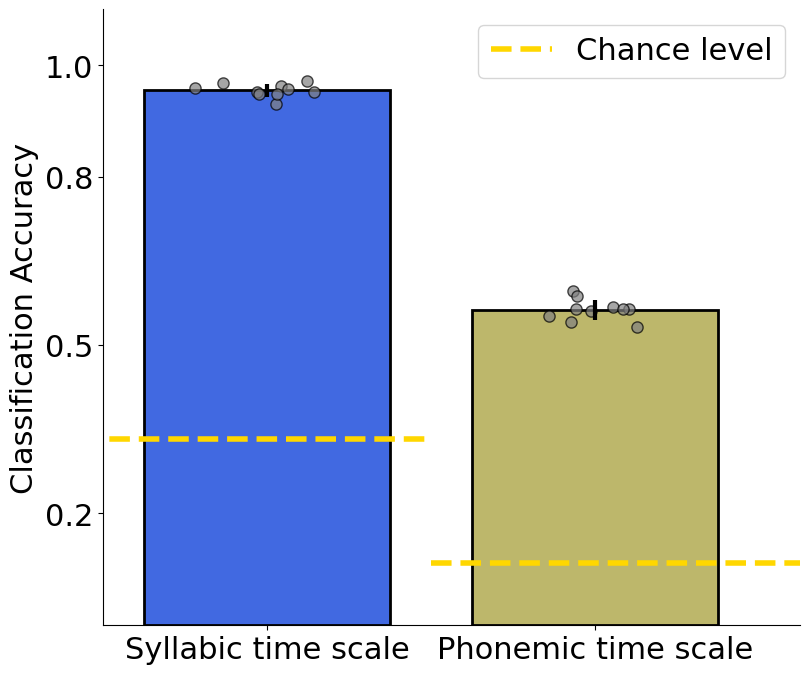

In [24]:
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=(9,8))

ax.bar(x=[0.5,0.9], height=dataplot ,yerr =[std1,std2], color= ['royalblue','darkkhaki'],edgecolor='k',linewidth=2,width=0.3,error_kw = {"linewidth":3})
ax.scatter(jiters(np.repeat([0.5,0.9],10)),df['decoding accuracy (%)'].values,s=65,color="grey", edgecolor='k',alpha=0.7)


#sns.swarmplot(x = "conditions", y= 'decoding accuracy (%)', data=df,ax = ax,size=7, color='grey',alpha=0.4, linewidth = 2,edgecolor = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,1.1)
ax.set_xlim(0.3,1.15)
#ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.hlines(1/3,0.2,0.7, linestyle='--', color = 'gold',linewidth=4);
ax.hlines(1/9,0.7,1.15, linestyle='--', color = 'gold',linewidth=4);
ax.set_xticks([0.5,0.9],['Syllabic time scale','Phonemic time scale']);
ax.set_yticks([0.2,0.5,0.8,1]);
ax.set_ylabel("Classification Accuracy");
ax.legend(custom_line, ['Chance level']);
#fig.savefig( "\\SVM_envelope.png",  dpi=300, format=None, metadata=None,bbox_inches=None,  facecolor='white', edgecolor='white' )
